In [12]:
import pandas as pd
import seaborn as sns
from tkinter import *
import joblib
from sklearn.metrics import precision_score,recall_score,f1_score

In [13]:
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


###  Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [14]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 10000
Number of Columns 14


### Check Null Values In The Dataset

In [15]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

###  Dropping Irrelevant Features

In [16]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [17]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [18]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


###  Encoding Categorical Data

In [19]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [20]:
data = pd.get_dummies(data,drop_first=True)

In [21]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


### Not Handling Imbalanced 

In [22]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<AxesSubplot: ylabel='count'>

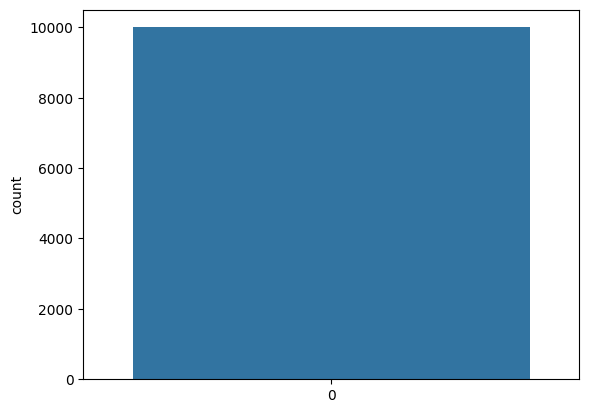

In [23]:
sns.countplot(data['Exited'])

In [24]:
X = data.drop('Exited',axis=1)
y = data['Exited']

###  Handling Imbalanced Data With SMOTE

In [25]:
from imblearn.over_sampling import SMOTE

In [26]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [27]:
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

###  Splitting The Dataset Into The Training Set And Test Set

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.20,random_state=42)

### 11. Feature Scaling

In [30]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [31]:
X_train=sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
X_train

array([[ 0.2876827 , -0.39668665, -1.03822989, ...,  1.72375221,
        -0.4577466 , -0.84170176],
       [ 1.09291444,  0.10748214, -1.40695894, ..., -0.58012978,
        -0.4577466 ,  1.18806928],
       [-0.08228864, -0.19501914, -0.66950083, ..., -0.58012978,
        -0.4577466 , -0.84170176],
       ...,
       [ 0.20063062,  0.2083159 ,  1.17414446, ..., -0.58012978,
        -0.4577466 ,  1.18806928],
       [ 0.70118008,  0.30914965,  0.8054154 , ..., -0.58012978,
        -0.4577466 , -0.84170176],
       [ 0.52707592,  1.01498596, -1.40695894, ...,  1.72375221,
        -0.4577466 ,  1.18806928]])

### 12. Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
log = LogisticRegression()

In [35]:
log.fit(X_train,y_train)

LogisticRegression()

In [36]:
y_pred1 = log.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy_score(y_test,y_pred1)

0.7853107344632768

In [45]:
precision_score(y_test,y_pred1)

0.5891472868217055

In [40]:
recall_score(y_test,y_pred1)

0.7952350289761752

In [42]:
f1_score(y_test,y_pred1)

0.7831325301204819

### 13. SVC

In [43]:
from sklearn import svm

In [44]:
svm = svm.SVC()

In [45]:
svm.fit(X_train,y_train)

SVC()

In [46]:
y_pred2 = svm.predict(X_test)

In [47]:
accuracy_score(y_test,y_pred2)

0.8433772755806654

In [48]:
precision_score(y_test,y_pred2)

0.8297872340425532

### 14. KNeighbors Classifier

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
knn = KNeighborsClassifier()

In [51]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [52]:
y_pred3 = knn.predict(X_test)

In [53]:
accuracy_score(y_test,y_pred3)

0.8258003766478342

In [54]:
precision_score(y_test,y_pred3)

0.8061349693251534

### 15. Decision Tree Classifier

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
dt = DecisionTreeClassifier()

In [57]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [58]:
y_pred4 = dt.predict(X_test)

In [59]:
accuracy_score(y_test,y_pred4)

0.7919020715630886

In [60]:
precision_score(y_test,y_pred4)

0.7693704600484261

### 16. Random Forest Classifier

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
rf = RandomForestClassifier()

In [63]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [64]:
y_pred5 = rf.predict(X_test)

In [65]:
accuracy_score(y_test,y_pred5)

0.8606403013182674

In [66]:
precision_score(y_test,y_pred5)

0.8476489028213167

### 17. Gradient Boosting Classifier

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

In [68]:
gbc = GradientBoostingClassifier()

In [69]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [70]:
y_pred6 = gbc.predict(X_test)

In [71]:
accuracy_score(y_test,y_pred6)

0.8452605147520402

In [72]:
precision_score(y_test,y_pred6)

0.8341740226986128

In [73]:
final_data=pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                        'ACC':[accuracy_score(y_test,y_pred1),
                              accuracy_score(y_test,y_pred2),
                              accuracy_score(y_test,y_pred3),
                              accuracy_score(y_test,y_pred4),
                              accuracy_score(y_test,y_pred5),
                              accuracy_score(y_test,y_pred6)]})

In [74]:
final_data

,Models,ACC
0,LR,0.785311
1,SVC,0.843377
2,KNN,0.825800
3,DT,0.791902
4,RF,0.860640
5,GBC,0.845261


In [75]:
import seaborn as sns

In [82]:
final_data=pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                        'PRE':[precision_score(y_test,y_pred1),
                              precision_score(y_test,y_pred2),
                              precision_score(y_test,y_pred3),
                              precision_score(y_test,y_pred4),
                              precision_score(y_test,y_pred5),
                              precision_score(y_test,y_pred6)]})

In [83]:
final_data

,Models,PRE
0,LR,0.771393
1,SVC,0.829787
2,KNN,0.806135
3,DT,0.769370
4,RF,0.847649
5,GBC,0.834174


### 18. Save The Model

In [85]:
X_res=sc.fit_transform(X_res)

In [86]:
rf.fit(X_res,y_res)

RandomForestClassifier()

In [87]:
joblib.dump(rf,'churn_predict_model')

['churn_predict_model']

In [88]:
model = joblib.load('churn_predict_model')

In [89]:
data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [90]:
model.predict([[619,42,2,0.0,0,0,0,101348.88,0,0,0]])

array([1], dtype=int64)

### GUI

In [92]:
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=float(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=float(e8.get())
    p9=int(e9.get())
    if p9 == 1:
        Geography_Germany=1
        Geography_Spain=0
        Geography_France=0
    elif p9 == 2:
        Geography_Germany=0
        Geography_Spain=1
        Geography_France=0
    elif p9 == 3:
        Geography_Germany=0
        Geography_Spain=0
        Geography_France=1  
    p10=int(e10.get())
    model = joblib.load('churn_predict_model')
    result=model.predict(sc.transform([[p1,p2,p3,p4,
                           p5,p6,
                           p7,p8,Geography_Germany,Geography_Spain,p10]]))
    
    if result == 0:
        Label(master, text="No Exit").grid(row=31)
    else:
        Label(master, text="Exit").grid(row=31)
    
    
master = Tk()
master.title("Bank Customers Churn Prediction Using Machine Learning")


label = Label(master, text = "Customers Churn Prediction Using ML"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="CreditScore").grid(row=1)
Label(master, text="Age").grid(row=2)
Label(master, text="Tenure").grid(row=3)
Label(master, text="Balance").grid(row=4)
Label(master, text="NumOfProducts").grid(row=5)
Label(master, text="HasCrCard").grid(row=6)
Label(master, text="IsActiveMember").grid(row=7)
Label(master, text="EstimatedSalary").grid(row=8)
Label(master, text="Geography").grid(row=9)
Label(master,text="Gender").grid(row=10)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)


e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10,column=1)

Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.3568.0_x64__qbz5n2kfra8p0\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\KIIT\AppData\Local\Temp\ipykernel_9384\2372013168.py", line 3, in show_entry_fields
    p2=int(e2.get())
ValueError: invalid literal for int() with base 10: ''
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.3568.0_x64__qbz5n2kfra8p0\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\KIIT\AppData\Local\Temp\ipykernel_9384\2372013168.py", line 2, in show_entry_fields
    p1=int(e1.get())
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.3568.0_x64__qbz5n2kfra8p0\lib\tkinter\__init__.py", line 3043, in get
    return self.tk.call(self._w, 'get')
_tkinter.TclError: inval